<p style="font-family: Arial; font-size:3em;color:black;"> Lab Exercise 5</p>

# TASK
The process below shows how to implement a simple linear regression analysis for a vehicle pricing scenario. Re-run it and take note of the R-squared value. Then, change the std value in np.random.normal to 1, 5 and 10. Observe the change in R-squared. How do you explain the change in R-squared value?

# Installation and imports

# Install

In [ ]:
!pip install numpy
!pip install matplotlib
!pip install scikit-learn

# Imports

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

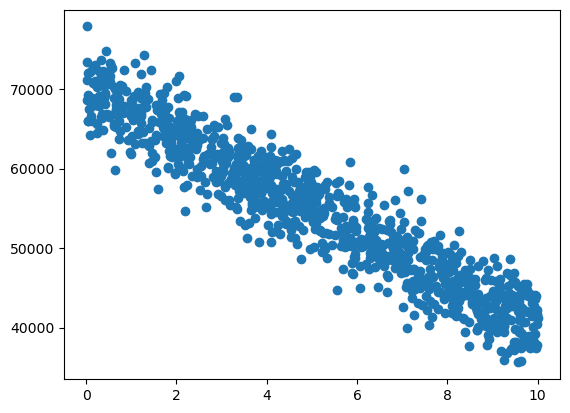

In [ ]:
vehicle_age = np.random.uniform(0,10,1000)
vehicle_price = 70000 - (vehicle_age + np.random.normal(0, 1, 1000)) * 3000
plt.scatter(vehicle_age, vehicle_price)

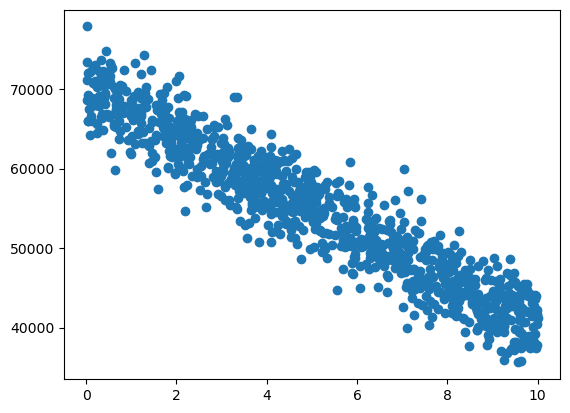

In [ ]:
vehicle_age = vehicle_age.reshape(-1, 1)  # Reshape for single feature, use (1,-1) for single sample
vehicle_price = vehicle_price.reshape(-1, 1)
plt.scatter(vehicle_age, vehicle_price)

In [ ]:
reg = LinearRegression().fit(vehicle_age, vehicle_price)
reg.score(vehicle_age, vehicle_price)

0.8960431405614275

# Method definitions
We will define a method to generate data, reshape it, and calculate the R-squared value.
This way, we can easily re-run the experiment for different values of std.

In [ ]:
def generate_data(std):
    age = np.random.uniform(0,10,1000)
    price = 70000 - (age + np.random.normal(0, std, 1000)) * 3000
    return age, price

def reshape_data(age, price):
    age = age.reshape(-1, 1)  # Reshape for single feature, use (1,-1) for single sample
    price = price.reshape(-1, 1)
    plt.scatter(age, price)
    return age, price

def calculate_r_squared(age, price):
    reg = LinearRegression().fit(age, price)
    return reg.score(age, price)

def regenerate_and_recalculate(std):
    age, price = generate_data(std)
    age, price = reshape_data(age, price)
    return calculate_r_squared(age, price)

R-squared for std = 1:  0.8862845296375411


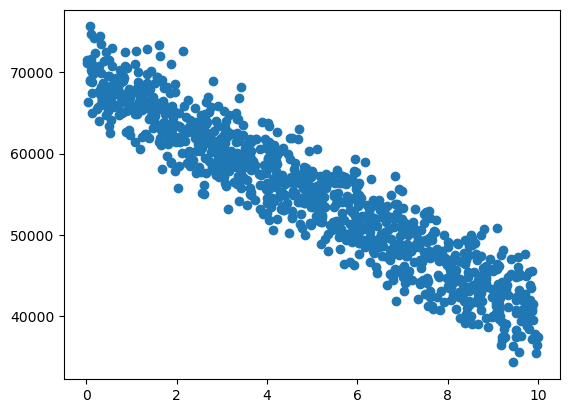

In [ ]:
# Now we will do the experiment for std = 1, 5, 10
std = 1
print("R-squared for std = 1: ", regenerate_and_recalculate(std))

R-squared for std = 5:  0.27124731457606577


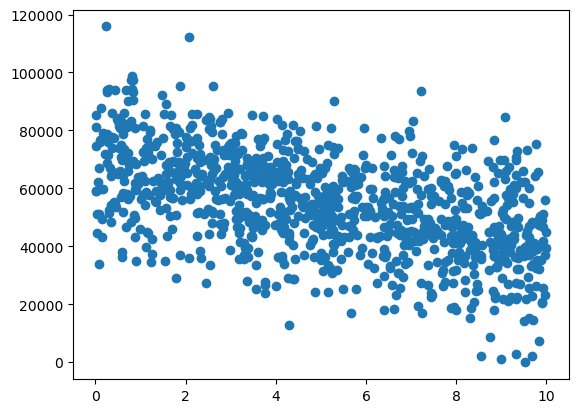

In [ ]:
std = 5
print("R-squared for std = 5: ", regenerate_and_recalculate(std))

R-squared for std = 10:  0.08335231399442111


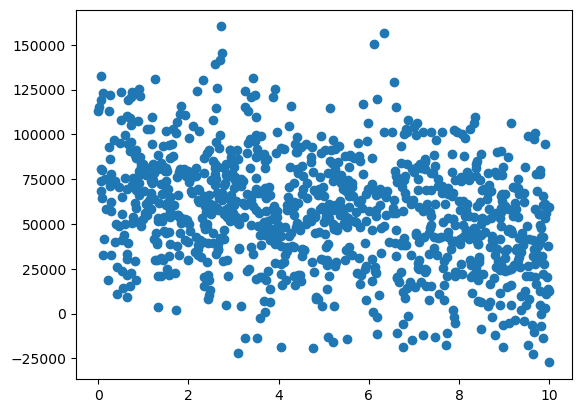

In [ ]:
std = 10
print("R-squared for std = 10: ", regenerate_and_recalculate(std))

# Conclusion

Since the R-squared is a metric that indicates how well the model explains the variance in the data (or predicts it), the higher the value the better the model fits the values for the provided data.

With an increasing standard deviation (Std), we are introducing more variability (or wildness) into the generated data, meaning that our points are more disperse.

This increased variability makes the model to struggle to accurately predict or fit the data, which is reflected in a lower R-squared value, which can be shown in the results bellow:

- R-squared for std = 1:  0.8890772972615142 (initial value)
- R-squared for std = 5:  0.24860474495652907 (lower than initial value)
- R-squared for std = 10:  0.08811296735993845 (lower than initial value and std = 5)

This also means that the model is performing worst as we increase the variability of the values.